### Initial Data Exploration

#### Time period is April 10, 2022 to October 7, 2022
#### This is a dynamic dataset, in that it updates daily. Why? Because every day crime happens. 

#### 0) Import relevant packages.

In [1]:
import pandas as pd
import numpy as np

#### 1) Read the datasets into dataframes.

In [2]:
# Read in the most up to date dataset
# This is a dynamic dataset, in that it updates daily

df = pd.read_csv("HPD_Crime_Incidents.csv", parse_dates=True, index_col="Date")

#### 2) Find out number of observations and columns.

In [3]:
print("Shape is:", df.shape)

Shape is: (22559, 9)


#### As of today, there are 10 columns and 22,559 rows.

#### Note: df.shape yields 9 columns because I used 'Date' as the index. Including 'Date' makes 10 columns.")

#### 3) Column data types.

In [4]:
df.dtypes

ObjectID         int64
KiloNBR         object
BlockAddress    object
CMID            object
CMAgency        object
Type            object
Status          object
Score           object
Side             int64
dtype: object

#### First of all, the column 'ObjectID' is for the purpose of identifying unique rows.
#### This column, along with 'Side' are integer types.
#### All other columns are object types, specifically string.

In [5]:
print('KiloNBR:', type(df['KiloNBR'][0]))
print('BlockAddress:', type(df['BlockAddress'][0]))
print('CMID:', type(df['CMID'][0]))
print('CMAgency:', type(df['CMAgency'][0]))
print('Type:', type(df['Type'][0]))
print('Status:', type(df['Status'][0]))
print('Score:', type(df['Score'][0]))
print('Date (aka index):', type(df.index[0]))

KiloNBR: <class 'str'>
BlockAddress: <class 'str'>
CMID: <class 'str'>
CMAgency: <class 'str'>
Type: <class 'str'>
Status: <class 'str'>
Score: <class 'str'>
Date (aka index): <class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### 4) Check for number of unique categories for categorical variables.

#### The columns, 'ObjectID', 'KiloNBR', 'Side', 'CMID', and 'CMAgency'
#### are either all ID columns or signify the HPD's jurisdiction.
#### Thus, they will be excluded from the analysis.
#### The remaining columns except for 'Date', are all categorical.

In [6]:
#only use:
# block addy
# date
# type
# status
# score

#drop without reassigning df's name
df.drop(['ObjectID', 'CMID', 'KiloNBR', 'CMAgency', 'Side'], axis=1, inplace=True)
print("Shape is now:", df.shape)

Shape is now: (22559, 4)


In [7]:
for col in df.columns:
    #print(df[col].unique()) # to print categories name only
    print(df[col].value_counts()) # to print count of every category

1400 BLOCK ALA MOANA BLVD    437
2400 BLOCK KALAKAUA AVE      296
800 BLOCK S BERETANIA ST     221
700 BLOCK KEEAUMOKU ST       135
2200 BLOCK KALAKAUA AVE      129
                            ... 
940100 BLOCK AWANUI ST         1
1600 BLOCK ALAPAI ST           1
PENSACOLA ST / WAIMANU ST      1
200 BLOCK THOMAS ST            1
AALA PL / AALA ST              1
Name: BlockAddress, Length: 6554, dtype: int64
THEFT/LARCENY               7452
VANDALISM                   2898
VEHICLE BREAK-IN/THEFT      2579
ASSAULT                     2082
MOTOR VEHICLE THEFT         2028
BURGLARY                    1475
DUI                          953
FRAUD                        861
DRUGS/ALCOHOL VIOLATIONS     713
SEX CRIMES                   664
ROBBERY                      393
WEAPONS                      276
DISTURBING THE PEACE         177
HOMICIDE                       8
Name: Type, dtype: int64
M    20096
U     2372
T       91
Name: Status, dtype: int64
R    10302
L     9884
      2372
Name: Scor

#### 5) Check for missing values.

In [8]:
df.isnull().sum()

BlockAddress    0
Type            0
Status          0
Score           1
dtype: int64

In [9]:
df[df.isnull().any(axis=1)]

,BlockAddress,Type,Status,Score
Date,,,,
2022-05-16 09:14:28,000 BLOCK 980761,THEFT/LARCENY,M,NaN


#### There is only one observation with a missing value, which shows the data is consistently recorded.

In [10]:
#drop the observation(s) with missing values

df.dropna(inplace=True)

In [11]:
#show there are no more observations with missing values
df.isnull().sum()

BlockAddress    0
Type            0
Status          0
Score           0
dtype: int64

#### 6) Identify potential features for machine learning (some columns may not have predictive power).
#### 7) Identify the target column.

#### Block Address can be used to predict Type. 
#### Status and Score are binary columns, and may be factored in as well because more features will improve the model. 
#### Date could also potentionally be a feature. 
#### To use Block Address and Date, I would need to group them into generic buckets/sections. 
#### Block Address may be grouped in county zones, and Date in months. 
#### For Block Address: I would need to sift through all the addresses and match them with county zones. (feed addresses into function, particularly key words).
#### For Date: I would need to create a new df to use Date as a column because I am currently using Date as the index. Then, I would need to use this Date column to create a new column that puts the observations into months (feed Date column into function).

#### 8) Look at the distribution of the target columns. for categorical type, find out if it is imblanced. For numeric type, see how it is distributed  (summary statistics, boxplot, histogram).

<AxesSubplot:>

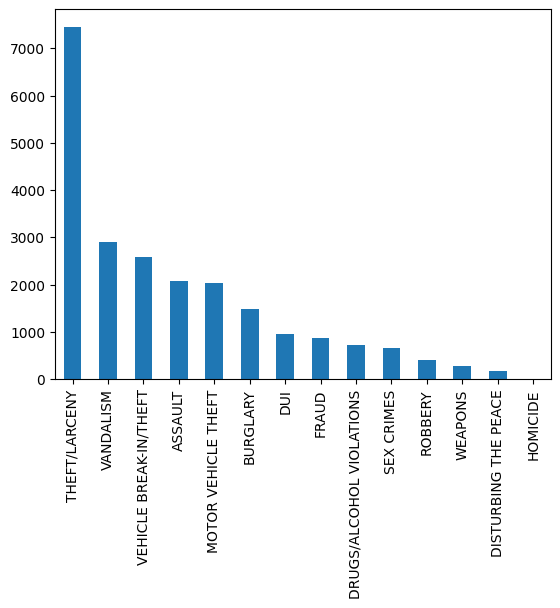

In [12]:
df['Type'].value_counts().plot(kind='bar')

#### The leading crime type is theft/larceny, with 7452 reported incidents.
#### This is over double the second leading crime type, vandalism (2898 incidents).
#### The least occuring crime type is homicide, with 8 reported incidents.

In [13]:
df.groupby(df.index).Type.value_counts()

Date                 Type                  
2022-04-08 00:05:03  DUI                       1
2022-04-08 00:34:12  VEHICLE BREAK-IN/THEFT    1
2022-04-08 00:48:26  VEHICLE BREAK-IN/THEFT    1
2022-04-08 00:53:18  DUI                       1
2022-04-08 01:01:03  DUI                       1
                                              ..
2022-10-07 03:27:56  ASSAULT                   1
2022-10-07 03:31:59  ASSAULT                   1
2022-10-07 04:03:08  ASSAULT                   1
2022-10-07 05:07:12  MOTOR VEHICLE THEFT       1
2022-10-07 05:53:51  WEAPONS                   1
Name: Type, Length: 22557, dtype: int64

In [14]:
df.groupby('BlockAddress').Type.value_counts()

BlockAddress             Type                    
000 BLOCK                MOTOR VEHICLE THEFT         6
                         ASSAULT                     2
                         FRAUD                       2
                         THEFT/LARCENY               2
                         VEHICLE BREAK-IN/THEFT      2
                                                    ..
YOUNG ST / PENSACOLA ST  VANDALISM                   1
YOUNG ST / PIIKOI ST     SEX CRIMES                  1
                         THEFT/LARCENY               1
YOUNG ST / POHA LN       DRUGS/ALCOHOL VIOLATIONS    1
YOUNG ST / PUNAHOU ST    DUI                         1
Name: Type, Length: 12536, dtype: int64

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=222d3efa-5158-4fc6-bb36-b8d4f3191ee7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>